# Optimization results for the Power series, Fourier series and Gaussian superposition pulses

In [1]:
# !pip install uncertainties
# !pip install quantum_gates

In [2]:
# !pip install pandas>= 1.4.0

## Imports

In [3]:
import numpy as np
import pandas as pd
import json 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import ast

import sys
sys.path.append('../..')
from pulse_opt.pulses.power_factory import PowerFactory
from pulse_opt.pulses.fourier_factory import FourierFactory
from pulse_opt.pulses.gaussian_factory import GaussianFactory

In [4]:
def set_matplotlib_style(overwrite: dict={}):
    """Sets the rc parameters to pre-defined values.

    Use the overwrite lookup to overwrite the default behaviour.

    Args:
        overwrite (dict): Lookup table which can be used to overwrite the default values.
    """
    plt.rcParams.update({
        "axes.titlesize": 16,
        "axes.labelsize": 12,
        "lines.linewidth": 1.5,
        "lines.markersize": 5,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": "medium",
        "figure.figsize": (8, 6),
    })

    # Plot background -> white inside, transparent outside
    plt.rcParams.update({
        "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
        "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
        "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
    })

    # Plot error bars
    plt.rcParams.update({
        "errorbar.capsize":  8,  # Length of the error bar caps
    })

    # Overwrite default behaviour
    if isinstance(overwrite, dict) and len(overwrite) > 0:
        plt.rcParams.update(overwrite)
    return


def activate_latex(preamble_list: list[str]=[]):
    """Activates LaTeX for use in Matplotlib and import some packages.

    Imported packages include amsmath, amssymb, and braket.

    Examples:
        preamble_list = ['\\usepackage{myfancypackage}'] where the string has an r as prefix.

    Args:
        preample_list (list[str]): List of raw str that represent the lines of the LaTeX preample used for imports.
    """

    pgf_with_latex = {
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": ["Helvetica"],
        "text.latex.preamble": "\n".join([
            r"\usepackage[utf8]{inputenc}",
            r"\usepackage[T1]{fontenc}",
            r"\usepackage{amsmath}",
            r"\usepackage{amssymb}",
            r"\usepackage{braket}",
        ] + preamble_list)
    }
    mpl.rcParams.update(pgf_with_latex)
    return

In [5]:
set_matplotlib_style()

## Paths

In [6]:
rel_folder = "../../results/integrals"
plot_folder = "../../plots/integrals"

In [7]:
import os

def create_folder(path):
    folders = path.split('/')
    current_path = ''
    for folder in folders:
        current_path += folder + '/'
        if not os.path.exists(current_path):
            os.makedirs(current_path)

## Settings

In [97]:
# theta = 0.785398
# theta_str = "pi quarter"
# theta = 1.570796
# theta_str = "pi half"
# theta = 2.356194
# theta_str = "pi three quarter"
theta = 3.141592
theta_str = "pi"

## Data loading 

In [98]:
runs = [
        'power_test',
        'fourier_test',
        'gaussian_test',
        'power_small',
        'fourier_small',
        'gaussian_small',
        'power',
        'fourier',
        'gaussian'
]
pd_lookup = {
    run: pd.read_csv(f"{rel_folder}/{run}/results.csv") for run in runs
}

In [99]:
# Query dfs to only contain rows for certain theta value
pd_lookup = {
    run: df.loc[abs(df['theta'] - theta) <= 1e-1] for run, df in pd_lookup.items()
}

In [100]:
factory_lookup = {
    'power_test': PowerFactory,
    'fourier_test': FourierFactory,
    'gaussian_test': GaussianFactory,
    'power_small': PowerFactory, 
    'fourier_small': FourierFactory,
    'gaussian_small': GaussianFactory,
    'power': PowerFactory,
    'fourier': FourierFactory,
    'gaussian': GaussianFactory
}

In [101]:
pd_lookup["power_test"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message


In [102]:
pd_lookup["power_small"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
3,3,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,1,3.141593,...,3.996803e-15,0.283552,7.340670e+03,1.0,3.200000e-05,3.200000e-05,1,56,True,`gtol` termination condition is satisfied.
7,7,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,2,3.141593,...,1.426947e-11,2.037828,1.468450e+04,1.0,3.200000e-05,3.200000e-05,1,210,True,`gtol` termination condition is satisfied.
11,11,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,3,3.141593,...,5.439649e-12,1.559281,2.269955e+06,1.0,2.560000e-07,2.560000e-07,1,92,True,`gtol` termination condition is satisfied.
15,15,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,4,3.141593,...,0.000000e+00,3.815757,5.453903e+07,1.0,1.024000e-08,1.024000e-08,1,129,True,`gtol` termination condition is satisfied.
19,19,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,5,3.141593,...,0.000000e+00,18.007340,1.892020e-09,1.0,2.048000e-09,2.048000e-09,2,261,True,`xtol` termination condition is satisfied.


In [103]:
pd_lookup["power"]

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
3,3,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,1,3.141593,...,3.996803e-15,0.622314,7.340670e+03,1.0,3.200000e-05,3.200000e-05,1,56,True,`gtol` termination condition is satisfied.
7,7,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,2,3.141593,...,1.426947e-11,4.780173,1.468450e+04,1.0,3.200000e-05,3.200000e-05,1,210,True,`gtol` termination condition is satisfied.
11,11,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,3,3.141593,...,5.439649e-12,3.052541,2.269955e+06,1.0,2.560000e-07,2.560000e-07,1,92,True,`gtol` termination condition is satisfied.
15,15,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,4,3.141593,...,0.000000e+00,6.091176,5.453903e+07,1.0,1.024000e-08,1.024000e-08,1,129,True,`gtol` termination condition is satisfied.
19,19,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,5,3.141593,...,0.000000e+00,46.322160,1.892020e-09,1.0,2.048000e-09,2.048000e-09,2,261,True,`xtol` termination condition is satisfied.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,423,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,6,3.141593,...,5.684342e-14,47.376563,6.843808e-09,1.0,2.048000e-09,2.048000e-09,2,206,True,`xtol` termination condition is satisfied.
427,427,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,7,3.141593,...,0.000000e+00,92.309234,5.427842e-09,1.0,2.048000e-09,2.048000e-09,2,275,True,`xtol` termination condition is satisfied.
431,431,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,8,3.141593,...,6.572520e-14,254.965715,2.985355e-05,1.0,1.280000e-06,1.280000e-06,0,1000,False,The maximum number of function evaluations is ...
435,435,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,9,3.141593,...,1.421085e-14,155.862896,5.830165e-09,1.0,2.048000e-09,2.048000e-09,2,375,True,`xtol` termination condition is satisfied.


In [104]:
pd_lookup["fourier_test"]

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message


In [105]:
pd_lookup["fourier_small"]

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
3,3,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,1,3.141593,...,4.440892e-16,6.900918,1.000000e-09,1.0,2.048000e-09,2.048000e-09,2,87,True,`xtol` termination condition is satisfied.
7,7,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,2,3.141593,...,8.881784e-16,23.249984,1.000000e-09,1.0,2.048000e-09,2.048000e-09,2,110,True,`xtol` termination condition is satisfied.
11,11,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,3,3.141593,...,1.998401e-15,91.319978,9.488509e-09,1.0,2.048000e-09,2.048000e-09,2,223,True,`xtol` termination condition is satisfied.
15,15,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,4,3.141593,...,2.131628e-14,311.608979,9.128210e-09,1.0,2.048000e-09,2.048000e-09,2,437,True,`xtol` termination condition is satisfied.
19,19,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,5,3.141593,...,5.551115e-15,922.739150,1.560546e-07,1.0,2.560000e-07,2.560000e-07,0,1000,False,The maximum number of function evaluations is ...
23,23,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,1,3.141593,...,1.518341e-12,1.863515,2.190845e+05,1.0,6.400000e-06,6.400000e-06,1,42,True,`gtol` termination condition is satisfied.
27,27,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,2,3.141593,...,0.000000e+00,23.286177,9.722171e-09,1.0,2.048000e-09,2.048000e-09,2,122,True,`xtol` termination condition is satisfied.
31,31,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,3,3.141593,...,2.775558e-15,157.198073,5.014536e-09,1.0,2.048000e-09,2.048000e-09,2,366,True,`xtol` termination condition is satisfied.
35,35,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,4,3.141593,...,2.842171e-14,334.720577,6.608645e-09,1.0,2.048000e-09,2.048000e-09,2,481,True,`xtol` termination condition is satisfied.
39,39,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,5,3.141593,...,2.842171e-14,609.106380,7.378862e-09,1.0,2.048000e-09,2.048000e-09,2,642,True,`xtol` termination condition is satisfied.


In [106]:
pd_lookup["fourier"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
3,3,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,1,3.141593,...,4.440892e-16,12.901789,1.000000e-09,1.0,2.048000e-09,2.048000e-09,2,87,True,`xtol` termination condition is satisfied.
7,7,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,2,3.141593,...,8.881784e-16,28.564370,1.000000e-09,1.0,2.048000e-09,2.048000e-09,2,110,True,`xtol` termination condition is satisfied.
11,11,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,3,3.141593,...,1.998401e-15,109.401994,9.488509e-09,1.0,2.048000e-09,2.048000e-09,2,223,True,`xtol` termination condition is satisfied.
15,15,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,4,3.141593,...,2.131628e-14,378.855978,9.128210e-09,1.0,2.048000e-09,2.048000e-09,2,437,True,`xtol` termination condition is satisfied.
19,19,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,5,3.141593,...,5.551115e-15,972.510591,1.560546e-07,1.0,2.560000e-07,2.560000e-07,0,1000,False,The maximum number of function evaluations is ...


In [107]:
pd_lookup["gaussian_test"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,scale,n,theta,...,x,optimality,constr_violation,execution_time,tr_radius,constr_penalty,status,niter,success,message


In [108]:
pd_lookup["gaussian_small"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,scale,n,theta,...,x,optimality,constr_violation,execution_time,tr_radius,constr_penalty,status,niter,success,message
3,3,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.1,1,3.141593,...,[1.00000057],0.000000e+00,0.0,0.002352,1.000000e+00,1.0,1,1,True,`gtol` termination condition is satisfied.
7,7,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.1,2,3.141593,...,[ 3.35957686 -1.35957686],2.537033e-08,0.0,57.886415,4.502958e-09,1.0,2,20,True,`xtol` termination condition is satisfied.
11,11,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.1,3,3.141593,...,[ 3.38008143 -0.01949241 -1.34109663],9.024951e-08,0.0,212.545203,2.952887e-09,1.0,2,27,True,`xtol` termination condition is satisfied.
15,15,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.1,4,3.141593,...,[ 3.61168011 -0.23907455 0.18654352 -1.50666313],7.395820e-09,0.0,179.787480,3.928416e+00,1.0,1,22,True,`gtol` termination condition is satisfied.
19,19,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.1,5,3.141593,...,[ 3.91079041 -0.39672046 0.04251683 0.217345...,3.536774e-08,0.0,496.789670,9.600601e-09,1.0,2,31,True,`xtol` termination condition is satisfied.


In [109]:
pd_lookup["gaussian"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,scale,n,theta,...,x,optimality,constr_violation,execution_time,tr_radius,constr_penalty,status,niter,success,message
3,3,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,1,3.141593,...,[1.],0.000000e+00,0.000000e+00,0.005147,1.000000e+00,1.0,1,1,True,`gtol` termination condition is satisfied.
7,7,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,2,3.141593,...,[ 3.30418404 -1.30418404],2.103868e-08,0.000000e+00,97.191959,3.569769e-09,1.0,2,18,True,`xtol` termination condition is satisfied.
11,11,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,3,3.141593,...,[ 3.30917186 -0.00487662 -1.29941862],5.036006e-09,0.000000e+00,159.472456,1.331880e+00,1.0,1,18,True,`gtol` termination condition is satisfied.
15,15,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,4,3.141593,...,[ 3.3485172 -0.04900504 0.03974391 -1.32999494],2.876970e-08,0.000000e+00,482.468909,4.295614e-09,1.0,2,23,True,`xtol` termination condition is satisfied.
19,19,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,5,3.141593,...,[ 3.39897422e+00 -7.55473335e-02 2.97633107e-...,5.196353e-08,4.440892e-16,1265.823164,1.785924e-09,1.0,2,40,True,`xtol` termination condition is satisfied.


## Prepare pulse and fun lookups

In [110]:
import re

def replace_whitespace_with_comma(string):
    return re.sub(r'(?<=\d|\.)\s+', ',', string.strip())

In [111]:
pulse_lookup = {}
key_lookup = {
    run: (
        ["n", "scale"] if "gaussian" in run else ["n", "shift"]
) for run in runs}

for run, df in pd_lookup.items(): 
    pulses = []
    for index, row in df.iterrows(): 
        args = {key: row[key] for key in key_lookup[run]}
        factory = factory_lookup[run]
        # Workaround to deal with json encoding -> Todo: Make cleaner.
        coeff_str = replace_whitespace_with_comma(row["x"])
        coeff = eval(coeff_str)
        coefficients = np.array(coeff)
        pulse_factory = factory(**args, perform_checks=False)
        pulse = pulse_factory.sample(coefficients)
        pulses.append(pulse)
    pulse_lookup[run] = pulses

In [112]:
fun_lookup = {}

for run, df in pd_lookup.items(): 
    funs = [row['fun'] for index, row in df.iterrows()]
    fun_lookup[run] = funs

In [113]:
fun_lookup

{'power_test': [],
 'fourier_test': [],
 'gaussian_test': [],
 'power_small': [3.0192757025063357,
  1.350759595866815,
  1.3283314620353912,
  0.9103665243303908,
  0.9065103585414944,
  2.359796421099201,
  1.903782730214807,
  1.8795915954295936,
  1.87637359669619,
  1.858569734986849,
  1.4694644876907343,
  1.3222191554694582,
  0.9650489922773052,
  0.8677492970925952,
  0.7305912662649486,
  1.4694644876907572,
  1.3210660913279844,
  0.9052601556301332,
  0.8787760977130158,
  0.7863226853173786,
  1.4694644876907368,
  1.3210660913412873,
  0.9052603219379464,
  1.3261964535104367,
  1.271851962534462],
 'fourier_small': [1.55892786606642,
  0.983965662544545,
  1.0431988950798372,
  0.8730173803931393,
  0.8573080944566255,
  1.2701477897250908,
  0.8729314989579908,
  1.0432020745953985,
  0.8751960021216183,
  0.8484300822080855,
  0.9216217278764328,
  0.7398723999091776,
  1.037847005010676,
  0.8781104640022439,
  1.0108212425645529,
  0.9216217277170072,
  0.7398692891

In [114]:
class_args_lookup = {}

for run, df in pd_lookup.items(): 
    class_args_list = []
    for index, row in df.iterrows(): 
        args = {key: row[key] for key in key_lookup[run]}
        class_args_list.append(args)
    class_args_lookup[run] = class_args_list

In [115]:
class_args_lookup

{'power_test': [],
 'fourier_test': [],
 'gaussian_test': [],
 'power_small': [{'n': 1, 'shift': 0.0},
  {'n': 2, 'shift': 0.0},
  {'n': 3, 'shift': 0.0},
  {'n': 4, 'shift': 0.0},
  {'n': 5, 'shift': 0.0},
  {'n': 1, 'shift': 0.25},
  {'n': 2, 'shift': 0.25},
  {'n': 3, 'shift': 0.25},
  {'n': 4, 'shift': 0.25},
  {'n': 5, 'shift': 0.25},
  {'n': 1, 'shift': 0.5},
  {'n': 2, 'shift': 0.5},
  {'n': 3, 'shift': 0.5},
  {'n': 4, 'shift': 0.5},
  {'n': 5, 'shift': 0.5},
  {'n': 1, 'shift': 0.75},
  {'n': 2, 'shift': 0.75},
  {'n': 3, 'shift': 0.75},
  {'n': 4, 'shift': 0.75},
  {'n': 5, 'shift': 0.75},
  {'n': 1, 'shift': 1.0},
  {'n': 2, 'shift': 1.0},
  {'n': 3, 'shift': 1.0},
  {'n': 4, 'shift': 1.0},
  {'n': 5, 'shift': 1.0}],
 'fourier_small': [{'n': 1, 'shift': 0.0},
  {'n': 2, 'shift': 0.0},
  {'n': 3, 'shift': 0.0},
  {'n': 4, 'shift': 0.0},
  {'n': 5, 'shift': 0.0},
  {'n': 1, 'shift': 0.25},
  {'n': 2, 'shift': 0.25},
  {'n': 3, 'shift': 0.25},
  {'n': 4, 'shift': 0.25},
  {'n':

In [116]:
coefficients_lookup = {}

for run, df in pd_lookup.items(): 
    coefficient_list = []
    class_args_list = []
    for index, row in df.iterrows(): 
        args = {key: row[key] for key in key_lookup[run]}
        factory = factory_lookup[run]
        # Workaround to deal with json encoding -> Todo: Make cleaner.
        coeff_str = replace_whitespace_with_comma(row["x"])
        coeff = eval(coeff_str)
        coefficients = np.array(coeff)
        coefficient_list.append(coefficients)
    coefficients_lookup[run] = coefficient_list

In [117]:
coefficients_lookup

{'power_test': [],
 'fourier_test': [],
 'gaussian_test': [],
 'power_small': [array([1.06534372e-03, 1.99786931e+00]),
  array([ 1.49632048e-03, -1.01874752e+01,  1.82767238e+01]),
  array([ 1.00225097e-03, -5.91718158e+00,  9.05916662e-01,  1.46224653e+01]),
  array([ 1.00046080e-03, -4.91355415e+01,  3.09267006e+02, -5.93211260e+02,
          3.53902917e+02]),
  array([ 1.00153057e-03, -3.98566484e+01,  2.09905445e+02, -2.65162421e+02,
         -7.07585360e+01,  1.88406922e+02]),
  array([1.11310095e-03, 3.99554760e+00]),
  array([ 1.08635218e-03,  1.30277066e+01, -1.54835178e+01]),
  array([ 9.67372847e-03,  1.22312003e+01, -1.67721207e+01,  4.84429406e+00]),
  array([ 9.45105261e-03,  1.21175068e+01, -1.68439127e+01,  4.40533788e+00,
          1.54038901e+00]),
  array([ 3.23483327e-03,  1.17310510e+01, -1.71761106e+01,  5.31626047e+00,
          2.14784751e+00,  1.72709405e+00]),
  array([1.        , 7.74898522]),
  array([1.01013553e-03, 8.16581661e+00, 1.19878784e+01]),
  array

## Visualization

# Visualizations 2
We iterate over the runs and plot them all at the same time. 

In [118]:
def convert_value_to_color(value):
    if value < 0 or value > 5:
        raise ValueError("Value must be between 0 and 5")
    colormap = plt.cm.get_cmap('RdYlBu_r')
    norm_value = value / 5.0
    color = colormap(norm_value)
    return color

In [119]:
def plot_runs(runs: list, pulse_lookup: dict, fun_lookup: dict, coefficients_lookup: dict, class_args_lookup: dict): 
    for run in runs: 
        # Lookup
        pulses = pulse_lookup[run]
        funs = fun_lookup[run]
        coefficients_list = coefficients_lookup[run]
        factoryClass = factory_lookup[run]
        class_arg_list = class_args_lookup[run]
        
        # Plot
        fig, ax = plt.subplots()
        for pulse, fun, coefficients, class_args in zip(pulses, funs, coefficients_list, class_arg_list): 
            x = np.linspace(0.0, 1.0, 100)
            waveform = pulse.get_pulse()
            y = np.array([waveform(s) for s in x])
            plt.plot(x, y, color=convert_value_to_color(fun), label=str(coefficients))
        plt.xlabel('Parametrization variable t')
        plt.ylabel("s [1]")
        plt.title(f"Optimized pulses with {run.replace('_', ' ')} ansatz")
        
        # Add color map
        cmap = plt.cm.get_cmap('RdYlBu_r')
        norm = plt.Normalize(vmin=0, vmax=5)
        sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, label='Loss')
        
        # Create folder to save
        create_folder(f"{plot_folder}/{run}")
        
        # Save
        plt.savefig(f"{plot_folder}/{run}/optimized_waveform_theta_{theta_str}.pdf")
        
        # Show
        plt.show()

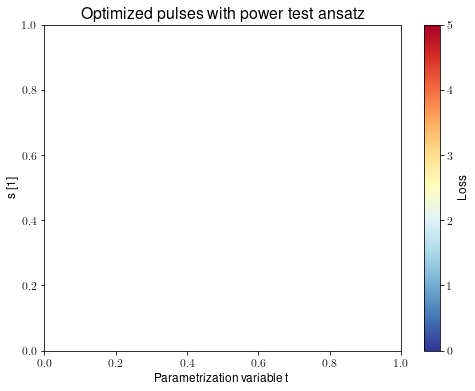

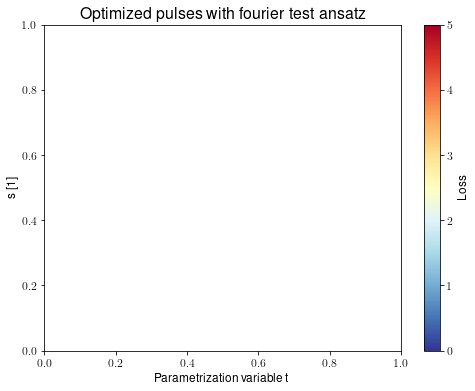

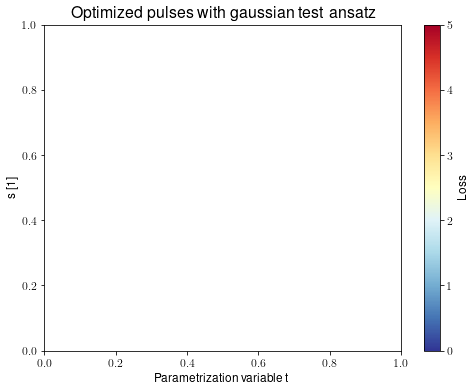

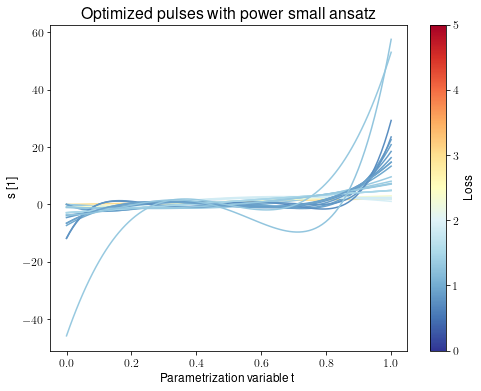

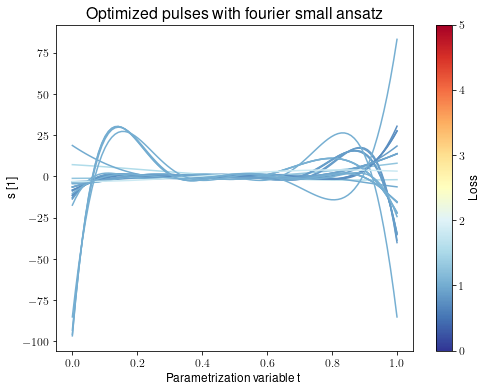

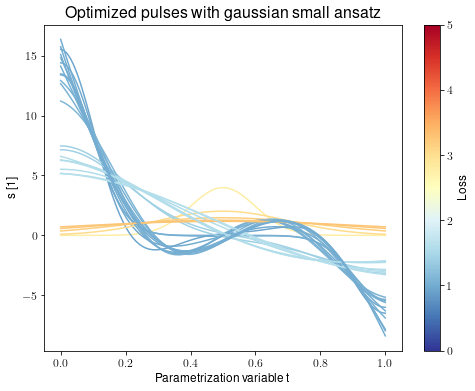

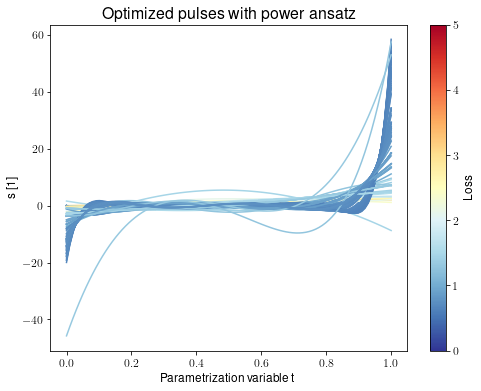

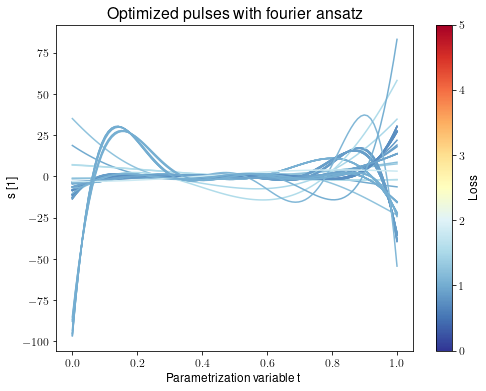

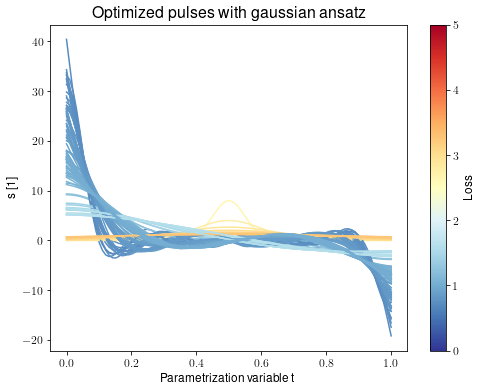

In [120]:
plot_runs(runs, pulse_lookup, fun_lookup, coefficients_lookup, class_args_lookup)

In [121]:
def plot_runs_parametrizations(runs: list, pulse_lookup: dict, fun_lookup: dict, coefficients_lookup: dict, class_args_lookup: dict): 
    for run in runs: 
        pulses = pulse_lookup[run]
        funs = fun_lookup[run]
        coefficients_list = coefficients_lookup[run]
        factoryClass = factory_lookup[run]
        class_arg_list = class_args_lookup[run]
        
        fig, ax = plt.subplots()
        for pulse, fun, coefficients, class_args in zip(pulses, funs, coefficients_list, class_arg_list): 
            x = np.linspace(0.0, 1.0, 100)
            waveform = pulse.get_parametrization()
            y = np.array([waveform(s) for s in x])
            plt.plot(x, y, color=convert_value_to_color(fun), label=str(coefficients))
        plt.xlabel('Parametrization variable t')
        plt.ylabel(r"$\theta$ [1]")
        plt.title(f"Optimized pulse parametrizations with {run.replace('_', ' ')} ansatz")
        
        cmap = plt.cm.get_cmap('RdYlBu_r')
        norm = plt.Normalize(vmin=0, vmax=5)
        sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, label='Loss')
        
        
        # Create folder to save
        create_folder(f"{plot_folder}/{run}")
        
        # Save
        plt.savefig(f"{plot_folder}/{run}/optimized_parametrization_theta_{theta_str}.pdf")
        
        # Show
        plt.show()

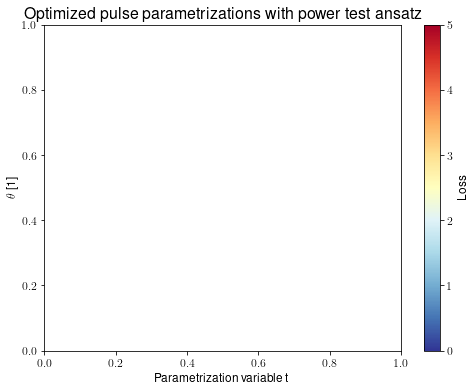

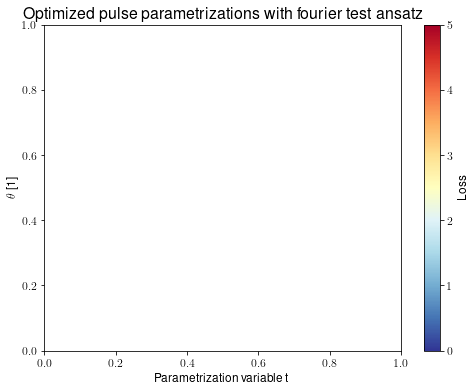

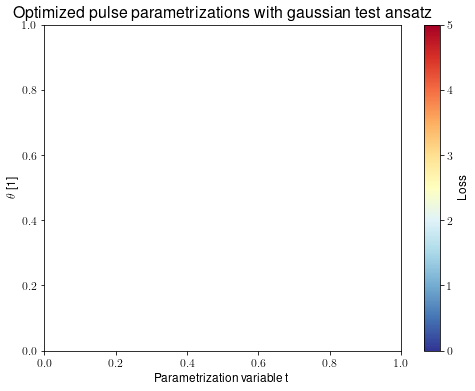

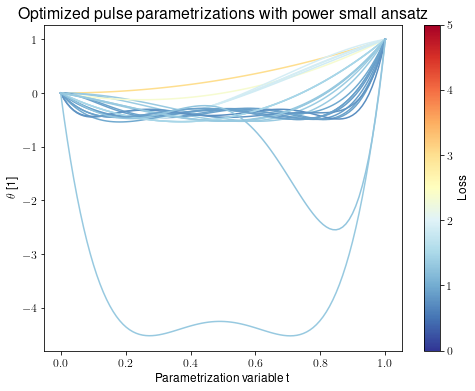

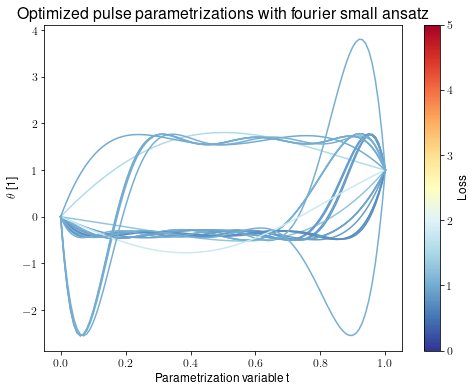

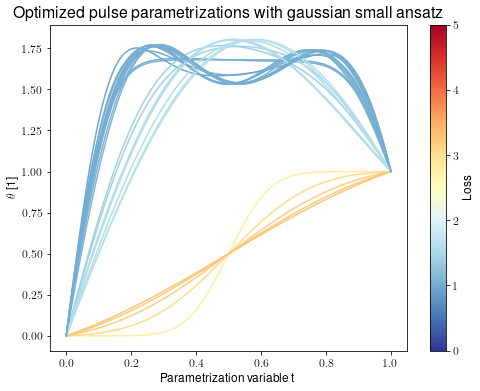

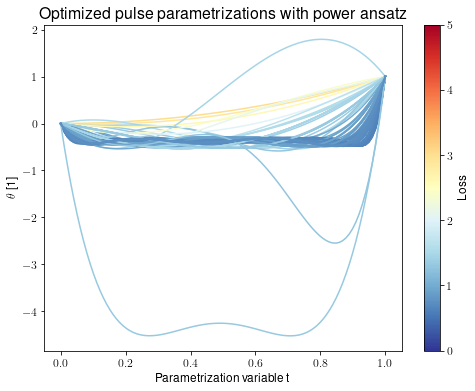

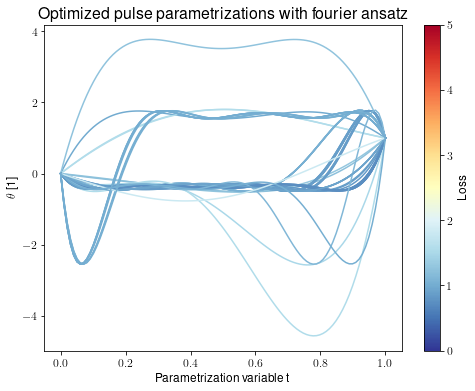

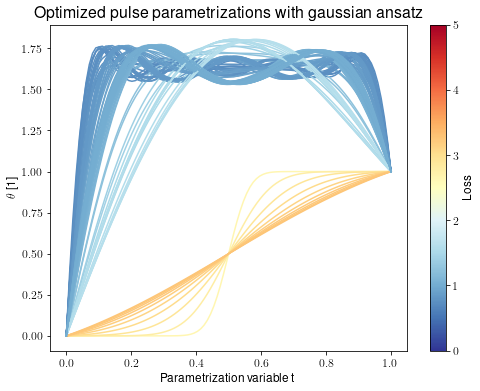

In [122]:
plot_runs_parametrizations(runs, pulse_lookup, fun_lookup, coefficients_lookup, class_args_lookup)

## Loss analysis
To understand the result, we have to better understand the Ito integrals, later referred to as integrands. 

In [66]:
from pulse_opt.integrals.utilities import integrand_lookup

In [67]:
total_integrand = lambda theta: sum((integrand(theta) for integrand in integrand_lookup.values()))

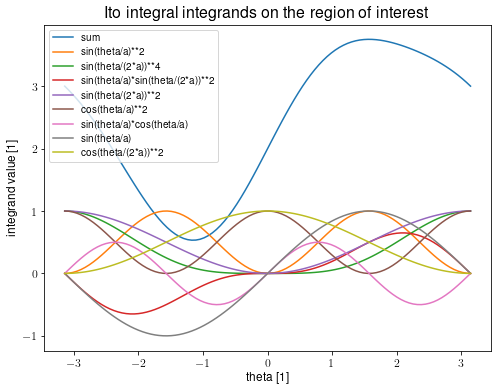

In [68]:
plt.figure()
x = np.linspace(-np.pi, np.pi, 100)
y = np.array([total_integrand(s) for s in x])
plt.plot(x, y, label="sum")
for name, integrand in integrand_lookup.items(): 
    y = np.array([integrand(s) for s in x])
    plt.plot(x, y, label=name)
plt.title("Ito integral integrands on the region of interest")
plt.xlabel('theta [1]')
plt.ylabel('integrand value [1]')
plt.legend()
create_folder(f"{plot_folder}/integrands")
plt.savefig(f"{plot_folder}/integrands/ito_integral_integrands.pdf")
plt.show()

We now count how many times each integral comes up in the gates. For the general single qubit gate: 

"sin(theta/(2*a))**4": 1x

"sin(theta/a)*sin(theta/(2*a))**2": 1x

"sin(theta/a)": 2x

"sin(theta/(2*a))**2": 2x

"sin(theta/a)**2": 2x

"sin(theta/a)*cos(theta/a)": 1x

"cos(theta/a)**2": 1x

"cos(theta/(2*a))**2: 1x
        
We see that not all integrals have the same weight. In the decomposition of the Noisy gate they also appear in different parts. 

In [69]:
single_qubit_loss_weights = {
    "sin(theta/(2*a))**4": 1.0,
    "sin(theta/a)*sin(theta/(2*a))**2": 1.0,
    "sin(theta/a)": 2.0,
    "sin(theta/(2*a))**2": 2.0,
    "sin(theta/a)**2": 2.0,
    "sin(theta/a)*cos(theta/a)": 1.0,
    "cos(theta/a)**2": 1.0,
    "cos(theta/(2*a))**2": 1.0,
}

In [70]:
single_qubit_loss = lambda theta: sum((integrand_lookup[integrand](theta) * weight) for integrand, weight in single_qubit_loss_weights.items())

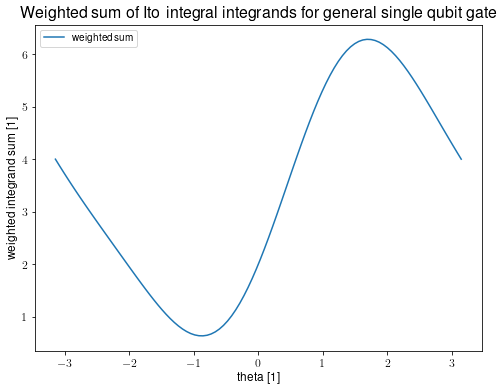

In [39]:
plt.figure()
x = np.linspace(-np.pi, np.pi, 100)
y = np.array([single_qubit_loss(s) for s in x])
plt.plot(x, y, label="weighted sum")
plt.title("Weighted sum of Ito integral integrands for general single qubit gate")
plt.xlabel('theta [1]')
plt.ylabel('weighted integrand sum [1]')
plt.legend()
create_folder(f"{plot_folder}/integrands")
plt.savefig(f"{plot_folder}/integrands/ito_integral_integrand_weighted_sum_general_single_qubit_gate.pdf")
plt.show()